In [1]:
import numpy as np
import matplotlib.pyplot as plt

import importlib

%matplotlib widget

import bh

In [105]:
importlib.reload(bh)

<module 'bh' from '/Users/liambrown/repositories/computing-project-lb880/barnes_hut/bh.py'>

In [117]:
num_particles = 1000

particles = [bh.Particle(1) for _ in range(num_particles)]

In [127]:
max_level = 10
n_crit = 2

root = bh.RootCell(0.5+0.5j, 1, max_level, 0.5)

root.populate_with_particles(particles, n_crit)
root.populate_mass_CoM()

In [128]:
for particle in particles:
    particle.potential = 0.0

root.calculate_particle_potentials()

bh.direct_particle_potentials(particles)

bh_pot = np.array([particle.potential for particle in particles])
dir_pot = np.array([particle.direct_potential for particle in particles])
diff_pot = bh_pot - dir_pot
frac_err = diff_pot / dir_pot

np.average(abs(frac_err))

0.0002784521328321925

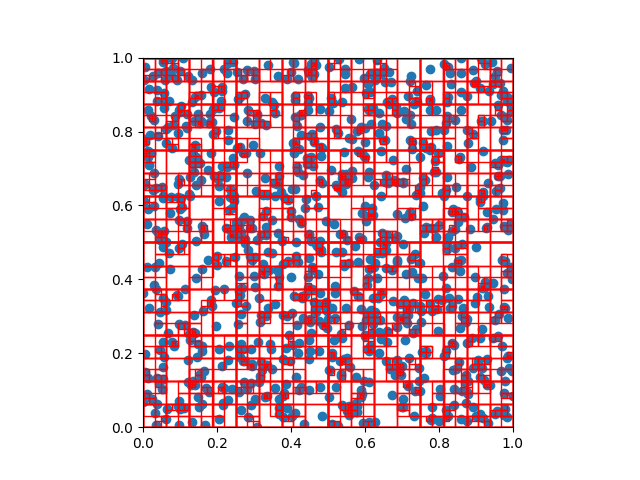

In [126]:
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

points = [source.centre for source in particles]
X,Y = np.real(points), np.imag(points)

ax.scatter(X,Y)

import matplotlib.patches as patches

def draw_rectangles(cell:bh.Cell):
    corner = cell.centre - cell.size*(0.5+0.5j)
    p = patches.Rectangle((corner.real,corner.imag),cell.size,cell.size, fill=False, color='red')
    ax.add_patch(p)
    if cell.bit_children == 0:
        return
    else:
        for child in cell.children:
            if child:
                draw_rectangles(child)

draw_rectangles(root)

plt.show()